In [72]:
import requests
import urllib.request
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
url = 'https://dolar.wilkinsonpc.com.co/dolar-historico/dolar-historico-2019.html'
response = requests.get(url)

In [49]:
soup = BeautifulSoup(response.text, 'html.parser')

In [50]:
dias = soup.findAll('div', {"class": "dh_col_fecha"})

In [51]:
precios = soup.findAll('div', {"class": "dh_col_precio"})

In [52]:
precios_limpio = precios
dias_limpio = dias

In [53]:
id = 0
for precio in precios:
    precios_limpio[id] = precio.get_text()
    precios_limpio[id] = precios_limpio[id].replace('$', '')
    id = id + 1

In [54]:
id = 0
for dia in dias:
    dias_limpio[id] = dia.get_text()
    id = id + 1


In [93]:
dias_limpio.reverse()
precios_limpio.reverse()

In [94]:
datos = {'DIA': dias_limpio, 'PRECIO': precios_limpio}

In [95]:
tabla = pd.DataFrame(datos)

In [96]:
tabla.head()

,DIA,PRECIO
0,01 Enero 2019,"3,249.75"
1,02 Enero 2019,"3,249.75"
2,03 Enero 2019,"3,250.01"
3,04 Enero 2019,"3,241.20"
4,05 Enero 2019,"3,208.56"


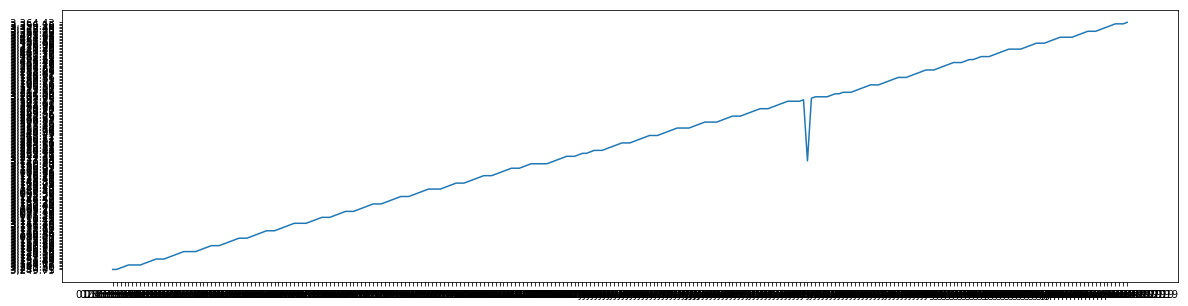

In [101]:
plt.plot('DIA', 'PRECIO', data=tabla)


In [102]:
fig_size = plt.rcParams["figure.figsize"]
 
fig_size[0] = 20
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

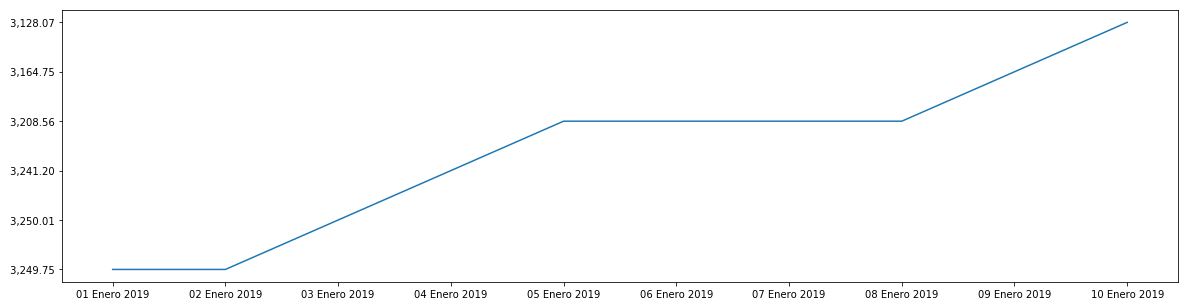

In [103]:
plt.plot('DIA', 'PRECIO', data=tabla.iloc[0:10])
